My specific role in this project focuses on assessing the safety of the Pittsburgh areas by analyzing crime rates.

To carry out my analysis, I utilized a dataset that provides detailed records of crime incidents and arrests across various neighborhoods, which is essential for my assessment. The assumption is that lower crime rates directly correlate with higher safety and livability.

# Data Analysis:
**Data Grouping:** Initially, I grouped the data by neighborhood using the groupby method in pandas to aggregate crime occurrences.

**Crime Counting:** For each neighborhood, I calculated the total number of crimes using the count method. This provided me with a clear picture of crime distribution across different areas.

**Selection Criteria:** Given the extensive number of neighborhoods in the dataset, I decided to focus on the top 10 neighborhoods with the lowest crime rates to make the data manageable and the analysis more focused.
Visualization: I created a bar graph to visually represent these findings.

# Alternative Metrics Explored:
While the primary metric of crime rate provides significant insights, I also considered other alternative approaches to enrich our analysis:
**Crime Severity Index:** Instead of merely counting the number of crimes, weighting crimes based on their severity could have provided a more nuanced view of neighborhood safety.

**Historical Trend Analysis:** Looking at the trends in crime rates over the past years could help identify neighborhoods that are not only safe now but have been improving over time.

**Comparative Crime Type Analysis:** Breaking down the crime statistics into types of crimes (e.g., property vs. violent crimes) could give potential residents a clearer picture of what kind of issues might be more prevalent in certain neighborhoods.

In [87]:
import pandas as pd;
import geopandas as gpd
import matplotlib.pyplot as plt

In [88]:
arrest_data = pd.read_csv("police_arrest_data.csv")

In [89]:
arrest_data.head(10)

,_id,PK,CCR,AGE,GENDER,RACE,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,1,1975272,16158872,42.0,F,B,2016-08-24T12:20:00,"4700 Block Centre AV Pittsburgh, PA 15213",3929 Retail Theft.,"4700 Block Centre AV Pittsburgh, PA 15213",Bloomfield,5,804.0,8.0,2.0,-79.949277,40.452551
1,2,1974456,16144120,31.0,M,W,2016-08-03T14:55:00,"4200 Block Steubenville PKE Pittsburgh, PA 15205",13(a)(16) Possession of Controlled Substance,"4200 Block Steubenville PKE Pittsburgh, PA 15205",Outside City,OSC,5599.0,NaN,NaN,-80.088018,40.440136
2,3,1974466,16144165,63.0,F,B,2016-08-03T16:45:00,"900 Block Freeport RD Fox Chapel, PA 15238",3929 Retail Theft.,"900 Block Freeport RD Fox Chapel, PA 15238",Westwood,5,2811.0,9.0,2.0,-79.891803,40.486625
3,4,1974550,16145257,25.0,F,W,2016-08-05T02:36:00,"Foreland ST & Cedar AV Pittsburgh, PA 15212",5503 Disorderly Conduct. / 5505 Public Drunken...,"Foreland ST & Cedar AV Pittsburgh, PA 15212",East Allegheny,1,2304.0,1.0,1.0,-80.001939,40.454080
4,5,1974596,16145962,25.0,M,B,2016-08-06T02:00:00,"900 Block Woodlow ST Pittsburgh, PA 15205",2702 Aggravated Assault. / 2705 Recklessy Enda...,"900 Block Woodlow ST Pittsburgh, PA 15205",Crafton Heights,5,2814.0,2.0,5.0,-80.052204,40.445900
5,6,1974556,16144301,45.0,M,W,2016-08-15T13:30:00,"600 Block 1st AV Pittsburgh, PA 15219",3929 Retail Theft.,"800 Block Hazelwood AV Pittsburgh, PA 15217",Greenfield,4,1517.0,5.0,3.0,-79.929238,40.419699
6,7,1974628,16147655,29.0,M,W,2016-08-16T13:00:00,"2300 Block Pioneer AV Pittsburgh, PA 15226",2701 Simple Assault.,"2300 Block Pioneer AV Pittsburgh, PA 15226",Brookline,6,1919.0,4.0,5.0,-80.020357,40.400037
7,8,1974607,16146037,21.0,F,B,2016-08-16T04:25:00,"600 Block 1st AV Pittsburgh, PA 15219",2701 Simple Assault. / 5505 Public Drunkenness...,"700 Block S Braddock AV Pittsburgh, PA 15221",Regent Square,4,1410.0,NaN,NaN,-79.834462,40.398957
8,9,1974643,16132537,17.0,M,B,2016-08-29T17:55:00,"1400 Block Washington BL Pittsburgh, PA 15206",903 Criminal Conspiracy. / 3701 Robbery.,"N Euclid AV & Broad ST Pittsburgh, PA 15206",East Liberty,5,1115.0,NaN,NaN,NaN,NaN
9,10,1974647,16138646,14.0,M,B,2016-08-23T13:36:00,Zone 2,3127 Indecent Exposure. / 3123(a)(6) IDSI with...,Zone 5,NaN,5,NaN,NaN,NaN,NaN,NaN


In [90]:
neighborhood_count = arrest_data.groupby("INCIDENTNEIGHBORHOOD")['_id'].count()

least_crime_neighborhoods = neighborhood_count.nsmallest(10)
print(least_crime_neighborhoods)

INCIDENTNEIGHBORHOOD
Mt. Oliver Neighborhood     2
Troy Hill-Herrs Island      6
Mt. Oliver Boro            18
Central Northside          23
Ridgemont                  33
Regent Square              35
New Homestead              39
Chartiers City             40
Swisshelm Park             40
East Carnegie              48
Name: _id, dtype: int64


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

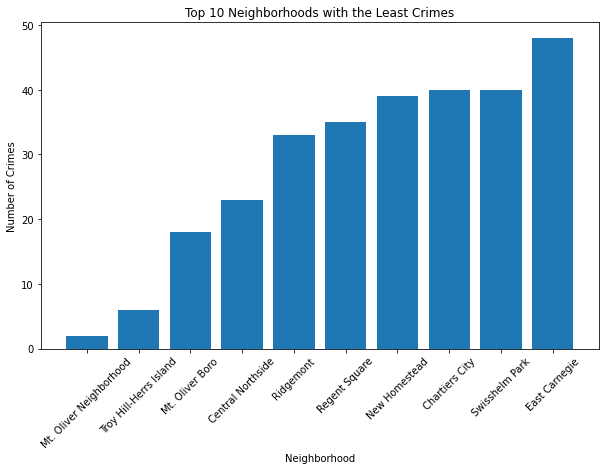

In [91]:
plt.figure(figsize=(10, 6))
plt.bar(least_crime_neighborhoods.index, least_crime_neighborhoods.values)
plt.xlabel('Neighborhood')
plt.ylabel('Number of Crimes')
plt.title('Top 10 Neighborhoods with the Least Crimes')
plt.xticks(rotation=45)  # rotating xaxis labels

# Data-Driven Approach:
The data-driven approach focuses primarily on quantitative metrics, such as the number of crimes reported. In this analysis, Mt. Oliver emerges as the superior choice with only 2 reported crimes, suggesting a high level of safety compared to the other neighborhoods.

# Personal Preference – Shadyside:
Despite the higher crime count of 971, Shadyside is my personal favorite neighborhood. This subjective preference is influenced by factors that are not in the crime data:
1. Amenities and Lifestyle: Shadyside is known for its vibrant mix of dining, shopping, and cultural amenities. The presence of boutiques, cafes, and a lively social scene might significantly enhance the quality of life, outweighing the concerns about crime rates.
2. Location and Accessibility: Shadyside's location might be more central or convenient in terms of commuting to work, accessing public transportation, or proximity to other city attractions and services, which can be a decisive factor for many people.
3. Historical and Aesthetic Value: The architectural beauty and the historical value of Shadyside might also play a significant role in its appeal. These aesthetic considerations, while subjective, are often highly valued by residents.

# Comparison and Insights:
The stark contrast in crime rates between Shadyside and Mt. Oliver (971 vs. 2) illustrates how a single metric, while useful, might not fully capture what makes a neighborhood truly desirable for an individual. While Mt. Oliver might be deemed "safer" based on crime statistics, the overall attractiveness of a neighborhood like Shadyside can compel individuals to accept higher risks for the trade-offs that matter most to them.

**Morgan: Housing Valuation and Income**


For the sake of brevity, the plot above focuses on the head and creates an appropriate generalization of the dataset. 
Overall many of the neighborhoods with low crime overlapped with higher income, but there were exceptions seen such as Mt. Oliver which was considerably cheaper than those listed in the graph.

In [69]:
import pandas as pd;

import numpy as np;

import geopandas as geo;

%matplotlib inline


import matplotlib.pyplot as plt




In [70]:
Housing_value= pd.read_csv("aggregate-household-income-in-the-past-12-months-in-2015-inflation-adjusted-dollars.csv")
# filter to important info


In [71]:
Housing_value

,Neighborhood,Id,Estimate; Aggregate household income in the past 12 months (in 2015 Inflation-adjusted dollars),Margin of Error; Aggregate household income in the past 12 months (in 2015 Inflation-adjusted dollars)
0,Allegheny Center,1,39947000,6437773
1,Allegheny West,2,23793300,22025939
2,Allentown,3,38303700,7490207.043
3,Arlington,4,35349900,6140662.723
4,Arlington Heights,5,2389600,1162393
...,...,...,...,...
86,Upper Lawrenceville,87,65738500,16007126
87,West End,88,3615800,2204875
88,West Oakland,89,16339500,3412753.172
89,Westwood,90,91857100,11304497.08


In [72]:
Housing_dataset_2 = pd.DataFrame({ 'Neighborhood' : ["Allegheny Center","Allegheny West", "Allentown", "Arlington", "Arlington Heights", "Upper Lawrenceville","West End","West Oakland", "Westwood" , "Windgap", "Mt. oliver" , "East Carnegie" ],  
                                  "income": [39947000, 23793300, 38303700, 35349900,  2389600, 65738500, 3615800, 16339500, 91857100, 34609300, 13962700,14945000

] })


                                 

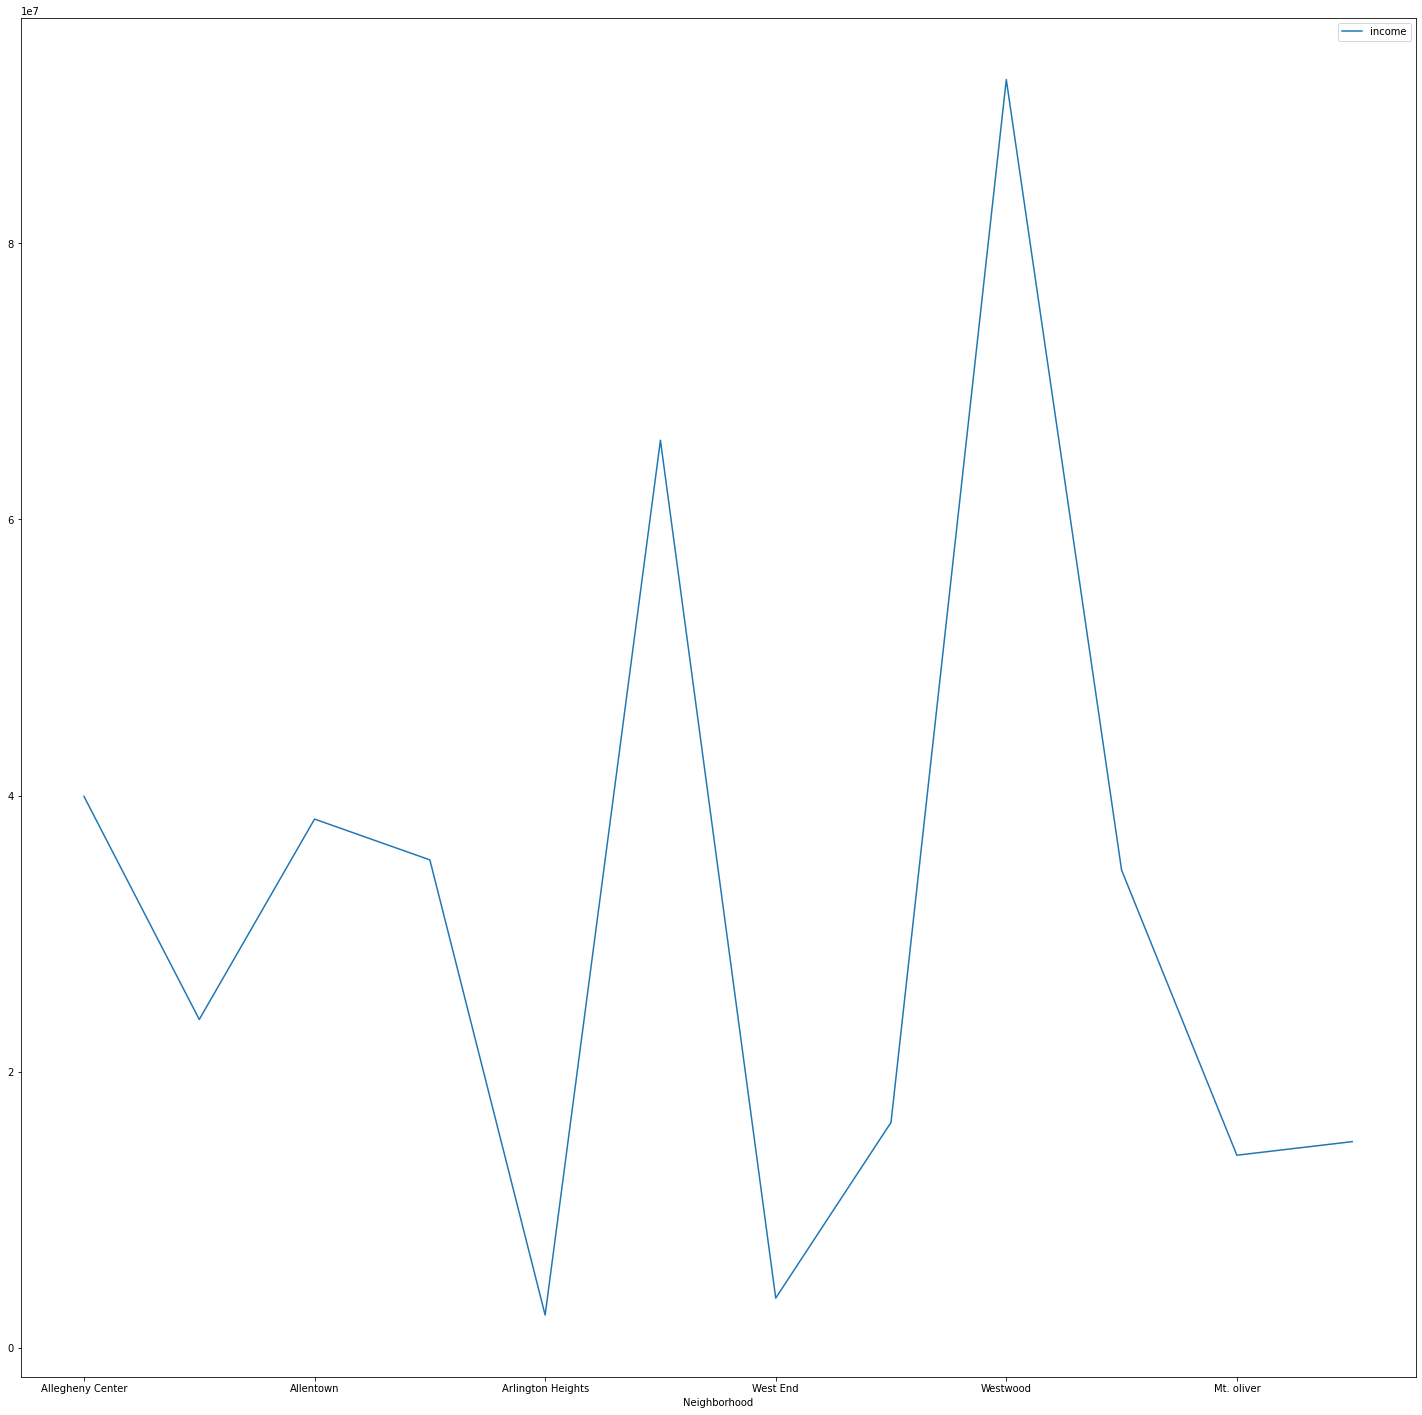

In [73]:
Housing_dataset_2.plot( x = 'Neighborhood',  y= 'income', figsize= (25, 25))

**Housing Value Throughout pittsburgh**

In [74]:
Housing_value= pd.read_csv("housing_units.csv")
# filter to important info


print( Housing_value.groupby("Neighborhood"))




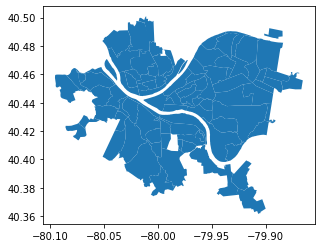

In [75]:
weight = Housing_value.groupby("Neighborhood").sum()['Id']
weight.sort_values(ascending=False)
#number of steps in lab 9 seems equivalent to 'id'

Housing_map = geo.read_file('Neighborhoods.shp')
Housing_map.plot()

In [76]:
Housing_weight = Housing_map.merge(Housing_value, how = 'left', left_on= 'hood', right_on = 'Neighborhood')

Housing_weight[['hood', 'Estimate; Total: - Less than $10,000', 'geometry']].head()

,hood,"Estimate; Total: - Less than $10,000",geometry
0,Central Oakland,0.0,"POLYGON ((-79.95304 40.44203, -79.95302 40.442..."
1,North Oakland,17.0,"POLYGON ((-79.95455 40.45882, -79.95427 40.458..."
2,West Oakland,0.0,"POLYGON ((-79.96230 40.44294, -79.96220 40.442..."
3,Crawford-Roberts,7.0,"POLYGON ((-79.98275 40.44641, -79.98273 40.446..."
4,Strip District,0.0,"POLYGON ((-79.97494 40.45629, -79.97484 40.456..."


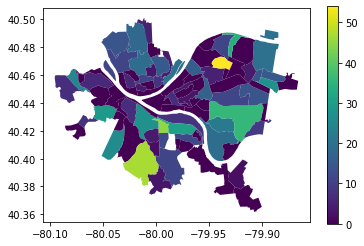

In [77]:
Housing_weight.plot(column ='Estimate; Total: - Less than $10,000', legend = True)


In [78]:
Housing_2milormore = Housing_map.merge(Housing_value, how = 'left', left_on= 'hood', right_on = 'Neighborhood')


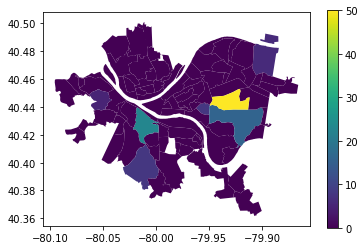

In [79]:
Housing_2milormore.plot(column = 'Estimate; Total: - $2,000,000 or more', legend = True)
#there are few houses in pittsburh=gh valued at $2,000,000 or more

In [80]:
Housing_500k =  Housing_map.merge(Housing_value, how = 'left', left_on= 'hood', right_on = 'Neighborhood')


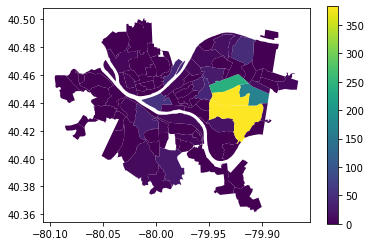

In [81]:
Housing_500k.plot(column = 'Estimate; Total: - $500,000 to $749,999', legend = True)

Overall, in relation to affordability of housing value the best neighborhood in terms of affordability is overbrook , garfield, and squirrel hill south neighborhood, but the choice becomes more nuanced in terms of neighborhood safety, mt oliver and the lower pittsburgh region, squirrel hill north, and particularly the mid-lower region of Beltzhover, allentown, and most synchronously in terms of crime safety: mount oliver, as could be seen in the beginning and below.



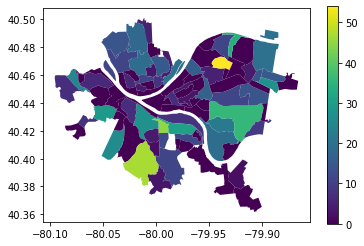

In [82]:
Housing_weight.plot(column ='Estimate; Total: - Less than $10,000', legend = True)

**Sarah: Affordable Fast food in Allegheny **

In [83]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt



In [84]:
df = pd.read_csv("fastfoodallegheny.csv")
# Drop the missing values rows
df.head(5)




,Name,Legal Name,Start Date,Street Number,Street Name,ZIP Code,Lat,Lon,Category
0,Adrian's Pizza,NaN,11/7/2014,605,Thompson Run Rd,15237,40.539465,-79.990764,Take Out
1,Adrian's Pizza Express,Rock Enterprises Inc,4/22/2004,7824,Perry Hwy,15237,40.551219,-80.037362,Take Out
2,Allegheny Sandwich Shop,NaN,2/24/1997,414,Grant St,15219,40.438110,-79.996860,NO Dollar Menu
3,Allegheny Sandwich Shoppe #3,Allegheny Sandwich Shoppe Inc,11/9/2001,440,Ross St,15219,40.438514,-79.995330,NO Dollar Menu
4,Amili's Pizzeria,NaN,2/26/1999,1021,Brownsville Rd,15210,40.406082,-79.991863,Take Out


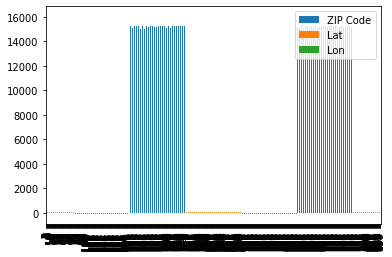

In [85]:
df.plot.bar()




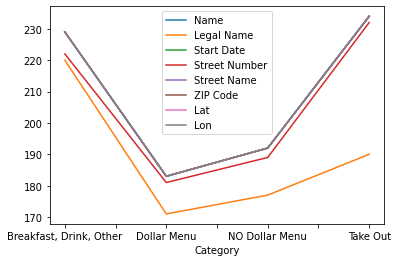

In [86]:

data = df.groupby("Category").count().plot()




In conclusion, Mount oliver  was the best   based on all three of our datasets as there was a proper synergy between the affordability, income , safety and access to food.